In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
from pandas.plotting import scatter_matrix
from wordcloud import WordCloud

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
fname = 'AB_NYC_2019.csv'

In [4]:
#getting the data set
data = pd.read_csv(fname)

#making some variables into string because they are not numerical variables
data.id = data.id.astype(str)
data.host_id = data.host_id.astype(str)
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
data.loc[(data.price == 0) | (data.availability_365 == 0)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
48,13050,bright and stylish duplex,50846,Jennifer,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,2017-01-01,0.10,1,0
66,16458,Light-filled 2B duplex in the heart of Park Sl...,64056,Sara,Brooklyn,Park Slope,40.67343,-73.98338,Entire home/apt,225,3,4,2017-09-24,0.16,1,0
88,20300,Great Location for NYC,76627,Pas,Manhattan,East Village,40.72912,-73.98057,Private room,50,1,2,2016-02-14,0.05,1,0
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0


In [6]:
#eliminating exagerated minimum number of nights
x = data.loc[data.minimum_nights >= 400].index.tolist()
data = data.drop(x, axis = 0)

In [7]:
"""
Eliminating useless data because are no longer available hotels, it can be seen in availability and it also in the price
"""
data = data.loc[(data.price != 0) & (data.availability_365 != 0)]
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
11,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39
12,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314


# Univariate Analysis

In [8]:
#getting data size
data_shape = data.shape
print("Number of observations: ", data_shape[0])
print("Number of columns: ", data_shape[1])

Number of observations:  31342
Number of columns:  16


In [9]:
#Getting column's names
data_columns = data.columns.tolist()
print("Columns: ",data_columns)

Columns:  ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


In [10]:
#getting a general description of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,31342.0,40.728405,0.056564,40.49979,40.688383,40.723725,40.76304,40.91306
longitude,31342.0,-73.948746,0.051406,-74.24442,-73.983280,-73.954115,-73.93014,-73.71299
price,31342.0,162.104078,254.485960,10.00000,70.000000,112.000000,189.00000,10000.00000
minimum_nights,31342.0,8.066365,18.530281,1.00000,2.000000,3.000000,5.00000,370.00000
number_of_reviews,31342.0,31.859390,51.645532,0.00000,2.000000,10.000000,39.00000,629.00000
reviews_per_month,26142.0,1.810332,1.805716,0.01000,0.450000,1.230000,2.68000,58.50000
calculated_host_listings_count,31342.0,10.338874,40.712897,1.00000,1.000000,1.000000,3.00000,327.00000
availability_365,31342.0,175.795067,126.180625,1.00000,55.000000,167.000000,305.00000,365.00000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31342 entries, 0 to 48894
Data columns (total 16 columns):
id                                31342 non-null object
name                              31339 non-null object
host_id                           31342 non-null object
host_name                         31334 non-null object
neighbourhood_group               31342 non-null object
neighbourhood                     31342 non-null object
latitude                          31342 non-null float64
longitude                         31342 non-null float64
room_type                         31342 non-null object
price                             31342 non-null int64
minimum_nights                    31342 non-null int64
number_of_reviews                 31342 non-null int64
last_review                       26142 non-null object
reviews_per_month                 26142 non-null float64
calculated_host_listings_count    31342 non-null int64
availability_365                  31342 non-null int

In [12]:
#getting na values
data.isna().sum()

id                                   0
name                                 3
host_id                              0
host_name                            8
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5200
reviews_per_month                 5200
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [13]:
#looking for repited data
data[data.duplicated() == True]
#there is no duplicated data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


## No graphical-tecniques

### Central tendency

In [14]:
#getting the mean of each variable
data.describe().T['mean'].round(2)

latitude                           40.73
longitude                         -73.95
price                             162.10
minimum_nights                      8.07
number_of_reviews                  31.86
reviews_per_month                   1.81
calculated_host_listings_count     10.34
availability_365                  175.80
Name: mean, dtype: float64

In [15]:
#getting the mode of each variable
"""
As it can be seen some columns have multiple modes, for example the RM has 5 different mode
"""
data.mode().head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10000070,Hillside Hotel,219517861,Sonder (NYC),Manhattan,Bedford-Stuyvesant,40.69054,-73.98822,Entire home/apt,150.0,1.0,0.0,2019-06-23,1.0,1.0,365.0
1,100002,NaN,NaN,NaN,NaN,NaN,40.69454,-73.95927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10000470,NaN,NaN,NaN,NaN,NaN,40.76035,-73.95343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10002428,NaN,NaN,NaN,NaN,NaN,NaN,-73.95166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000788,NaN,NaN,NaN,NaN,NaN,NaN,-73.95136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#getting the median of each variable
data.median().round(2)

id                                22567041.50
host_id                           41095607.50
latitude                                40.72
longitude                              -73.95
price                                  112.00
minimum_nights                           3.00
number_of_reviews                       10.00
reviews_per_month                        1.23
calculated_host_listings_count           1.00
availability_365                       167.00
dtype: float64

## Dispersion

In [17]:
"""
getting the standar deviation of each variable, even though has been shown before, this is in order to have it in 
a specific section
"""
data.std().round(2)

latitude                            0.06
longitude                           0.05
price                             254.49
minimum_nights                     18.53
number_of_reviews                  51.65
reviews_per_month                   1.81
calculated_host_listings_count     40.71
availability_365                  126.18
dtype: float64

In [18]:
#getting the variance of each variable
data.var()

latitude                              0.003200
longitude                             0.002643
price                             64763.104001
minimum_nights                      343.371302
number_of_reviews                  2667.260947
reviews_per_month                     3.260609
calculated_host_listings_count     1657.539958
availability_365                  15921.550197
dtype: float64

In [19]:
#interqualite range, it is the difference between the third and first quartile
(data.quantile(.75) - data.quantile(.25)).round(2)

latitude                            0.07
longitude                           0.05
price                             119.00
minimum_nights                      3.00
number_of_reviews                  37.00
reviews_per_month                   2.23
calculated_host_listings_count      2.00
availability_365                  250.00
dtype: float64

## Skewness

In [20]:
"""
getting skewness of each column
where value = 0 means is symmetrical
value > 0 means is positive asymmetrical
value < 0 means is negative asymmetrical
"""
data.skew()

id                                -0.383204
host_id                            0.864015
latitude                           0.180154
longitude                          1.141033
price                             17.039884
minimum_nights                    10.276135
number_of_reviews                  3.039931
reviews_per_month                  3.000158
calculated_host_listings_count     6.320228
availability_365                   0.126323
dtype: float64

In [21]:
"""
Getting the kurtosis measurement that means if the curve is Leptokurtic, value > 0, the data is containing in the median 
or rather in the interquartile rangge
if it is Mesokurtic means is normal and the value is equal to 0
or if it is Platykurtic means that the tails have weight or a lof of values, value < 0
"""
"""
From this we can see the most leptokurtic curves are CRIM, ZN and B, there is a few platykurtic and most are similar to
mesokurtic but they do not belong to that classification
"""
data.kurtosis()

id                                 -1.160456
host_id                            -0.693562
latitude                            0.121911
longitude                           3.823223
price                             466.221812
minimum_nights                    162.981394
number_of_reviews                  13.341129
reviews_per_month                  43.902230
calculated_host_listings_count     42.199756
availability_365                   -1.473430
dtype: float64

## Graphical tecniques

In [22]:
airbnbplaces = data.neighbourhood_group.value_counts()
#This is something common, since that areas are the most popular en NY
airbnbplaces

Manhattan        13554
Brooklyn         12248
Queens            4296
Bronx              913
Staten Island      331
Name: neighbourhood_group, dtype: int64

In [23]:
"""
since in this analysis last_review, reviews_per_mont, name, id, host_id and host_name are not neccesary will 
be eliminated
"""
important_columns = ['neighbourhood_group', 'neighbourhood','latitude', 'longitude', 'price', 'minimum_nights','availability_365','room_type', 'name']

data_f = data[important_columns]

In [24]:
data_f.head()

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,availability_365,room_type,name
0,Brooklyn,Kensington,40.64749,-73.97237,149,1,365,Private room,Clean & quiet apt home by the park
1,Manhattan,Midtown,40.75362,-73.98377,225,1,355,Entire home/apt,Skylit Midtown Castle
2,Manhattan,Harlem,40.80902,-73.94190,150,3,365,Private room,THE VILLAGE OF HARLEM....NEW YORK !
3,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,194,Entire home/apt,Cozy Entire Floor of Brownstone
5,Manhattan,Murray Hill,40.74767,-73.97500,200,3,129,Entire home/apt,Large Cozy 1 BR Apartment In Midtown East


<Figure size 3600x2160 with 0 Axes>

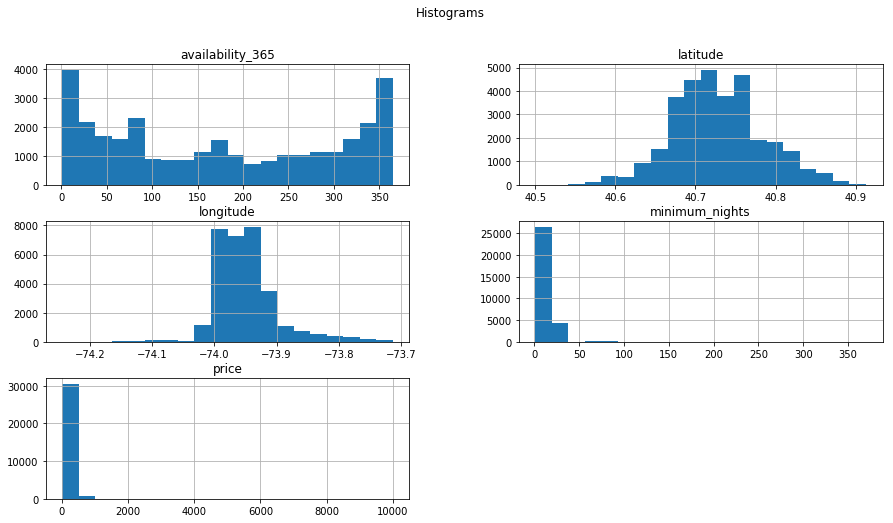

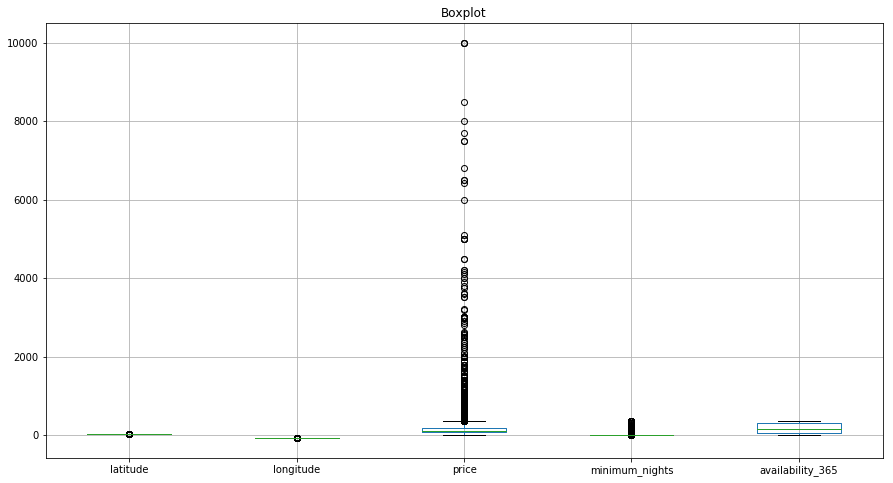

In [25]:
# variable distribution
plt.figure(figsize = (50,30))
data_f.hist(bins = 20)
plt.suptitle("Histograms")
plt.show()

imag = data_f.boxplot()
plt.title("Boxplot")
plt.show()

In [26]:
"""
As we can see the price has many outliers and
Since this analysis will be directe to prices, I will apply a elimination of outliers of this category, so %1 from
the top
"""
upper_limit = data_f.price.quantile(.99)
lower_limit = data_f.price.quantile(.1)
data_f = data_f.loc[data_f.price <= upper_limit]
data_f = data_f.loc[data_f.price >= lower_limit]

<Figure size 3600x2160 with 0 Axes>

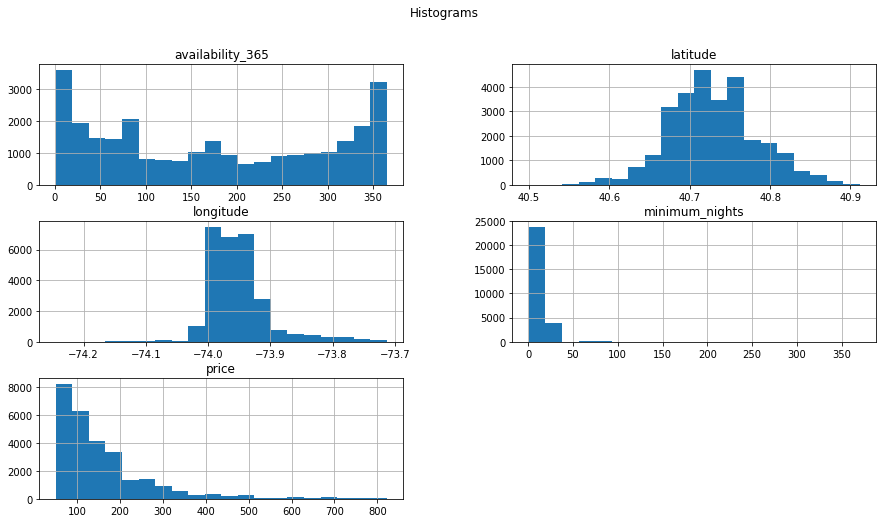

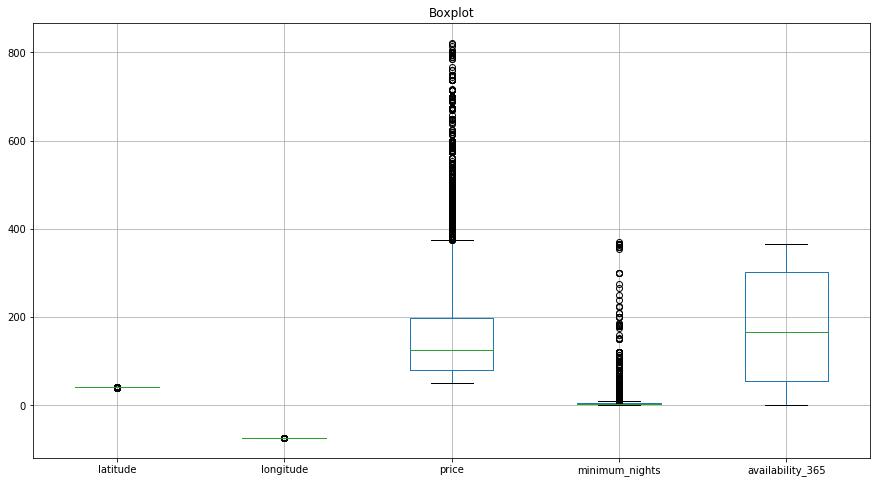

In [27]:
# variable distribution
plt.figure(figsize = (50,30))
data_f.hist(bins = 20)
plt.suptitle("Histograms")
plt.show()

data_f.boxplot()
plt.title("Boxplot")
plt.show()

In [28]:
"""
As we can see there is still some outliers, but not as in the past that some of them were too far from the boxplot
"""

'\nAs we can see there is still some outliers, but not as in the past that some of them were too far from the boxplot\n'

C:\Users\jeorv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


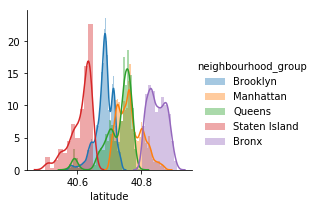

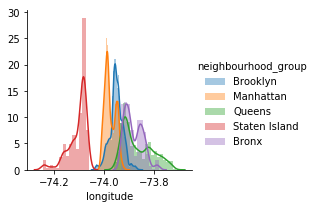

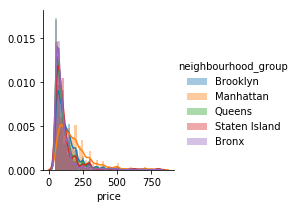

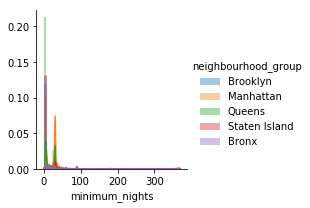

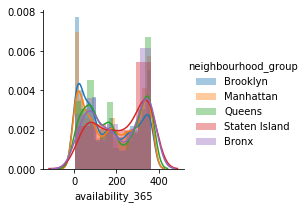

In [29]:
# Seaborn distribution
i = 0
for column in data_f.columns[2:7]:
    i += 1
    g = sns.FacetGrid(data_f, hue = "neighbourhood_group")
    g = g.map(sns.distplot, column)
    g = g.add_legend()
    plt.show()
    g.savefig(str(i)+"seaborn.png")

# Multivariate Analysis

## No graphical-tecnhniques

### Covariance

In [30]:
#getting the covariance of the dataset
covariance_matrix = data.cov()
covariance_matrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,0.003200,0.000229,0.485847,0.046187,-0.039294,-0.000517,0.058362,-0.025589
longitude,0.000229,0.002643,-2.078074,-0.093962,0.089869,0.011011,-0.305805,0.182622
price,0.485847,-2.078074,64763.104001,244.063416,-958.380694,-22.886098,629.963868,2393.357471
minimum_nights,0.046187,-0.093962,244.063416,343.371302,-135.755481,-5.803563,122.960663,348.320068
number_of_reviews,-0.039294,0.089869,-958.380694,-135.755481,2667.260947,47.928588,-242.800854,65.349761
reviews_per_month,-0.000517,0.011011,-22.886098,-5.803563,47.928588,3.260609,-3.124675,-14.488672
calculated_host_listings_count,0.058362,-0.305805,629.963868,122.960663,-242.800854,-3.124675,1657.539958,966.218359
availability_365,-0.025589,0.182622,2393.357471,348.320068,65.349761,-14.488672,966.218359,15921.550197


### Correlation

In [31]:
# correlation matrix
correlation_matrix = data.corr()
correlation_matrix

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.078617,0.033752,0.044065,-0.013451,-0.005028,0.025343,-0.003585
longitude,0.078617,1.000000,-0.158848,-0.098640,0.033850,0.118437,-0.146116,0.028154
price,0.033752,-0.158848,1.000000,0.051756,-0.072919,-0.063739,0.060802,0.074533
minimum_nights,0.044065,-0.098640,0.051756,1.000000,-0.141854,-0.211357,0.162987,0.148972
number_of_reviews,-0.013451,0.033850,-0.072919,-0.141854,1.000000,0.488214,-0.115474,0.010028
reviews_per_month,-0.005028,0.118437,-0.063739,-0.211357,0.488214,1.000000,-0.054390,-0.064626
calculated_host_listings_count,0.025343,-0.146116,0.060802,0.162987,-0.115474,-0.054390,1.000000,0.188083
availability_365,-0.003585,0.028154,0.074533,0.148972,0.010028,-0.064626,0.188083,1.000000


## Graphical techniques

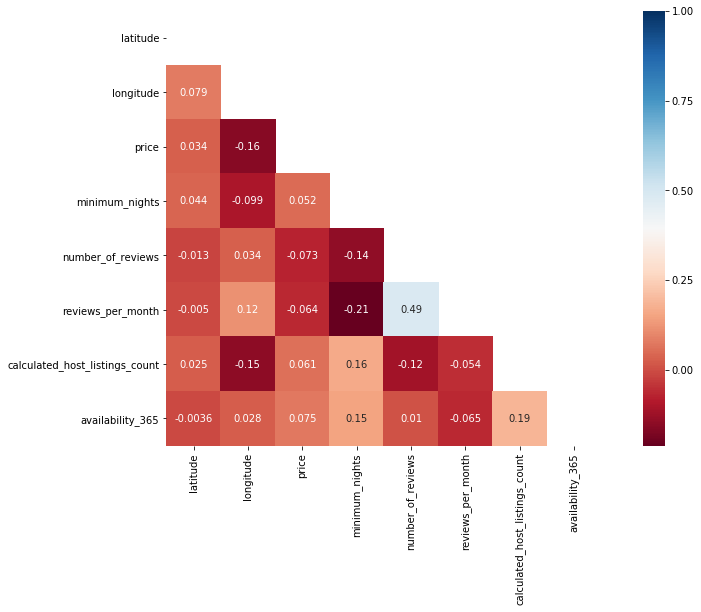

In [32]:
#Heatmap
#plotting the correlational matrix
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu', square = True, mask = mask)
plt.show()
figure = heatmap.get_figure()
figure.savefig("heatmap.png", dpi = 1000)

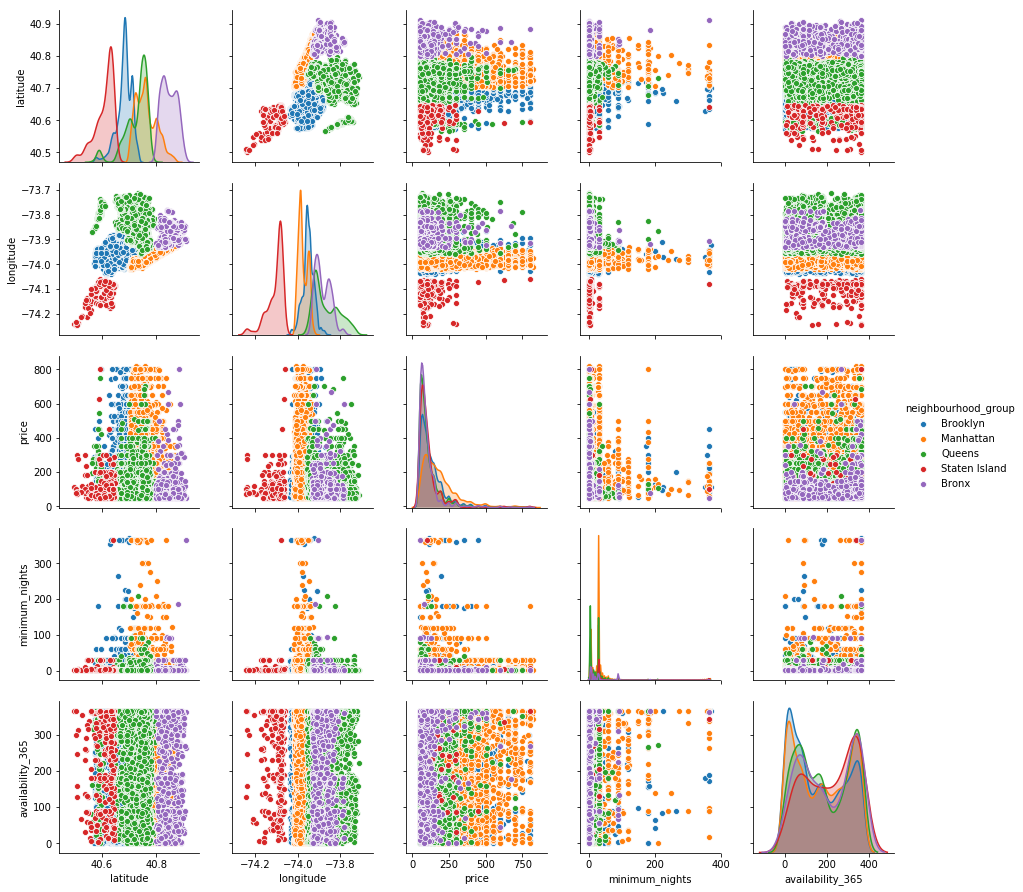

In [33]:
#getting the scatters plot having the neighbourhood_groups as classificator
g = sns.pairplot(data_f, hue = "neighbourhood_group")
plt.show()

### Mean price by neighbourhood

In [34]:
"""
getting the mean price by neighbourhood, so it is necessary to apply a groupby and then get the mean
for each variabel
"""
analysis_neighbourhood = data_f.groupby("neighbourhood")
analysis_neighbourhood = analysis_neighbourhood.mean().reset_index(drop = False)
analysis_neighbourhood = analysis_neighbourhood.sort_values(by='price', ascending = False).reset_index(drop=True)

In [35]:
analysis_neighbourhood.head()

,neighbourhood,latitude,longitude,price,minimum_nights,availability_365
0,Fort Wadsworth,40.595460,-74.060920,800.000000,7.000000,365.000000
1,Riverdale,40.885943,-73.914108,331.500000,7.666667,208.333333
2,Tribeca,40.717390,-74.007065,327.076190,13.819048,181.342857
3,NoHo,40.727227,-73.992896,303.346154,7.653846,150.500000
4,Flatiron District,40.741185,-73.988349,303.266667,7.466667,192.688889


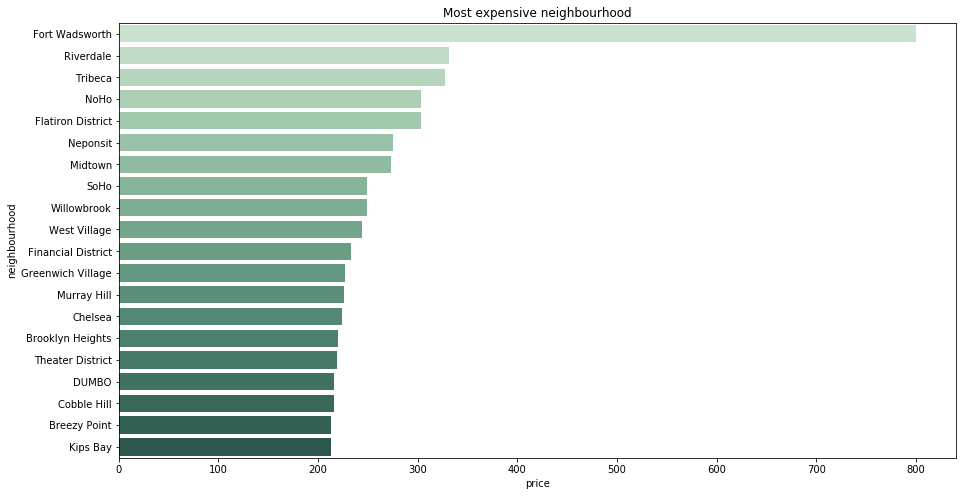

In [36]:
#plotting the twenty most expensive neighbourhoods
bar = sns.barplot(x='price', y = 'neighbourhood', data = analysis_neighbourhood.head(20), orient = "h", palette = "ch:2.5,-.2,dark=.3")
plt.title("Most expensive neighbourhood")
plt.show()
fig1 = bar.get_figure()
fig1.savefig("most_expensive.png", dpi = 1000)

In [37]:
data.loc[data.neighbourhood == "Fort Wadsworth"]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
25386,20305160,Beach House Retreat. 15 minutes from Manhattan.,1715301,Mark,Staten Island,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,800,7,0,NaN,NaN,3,365


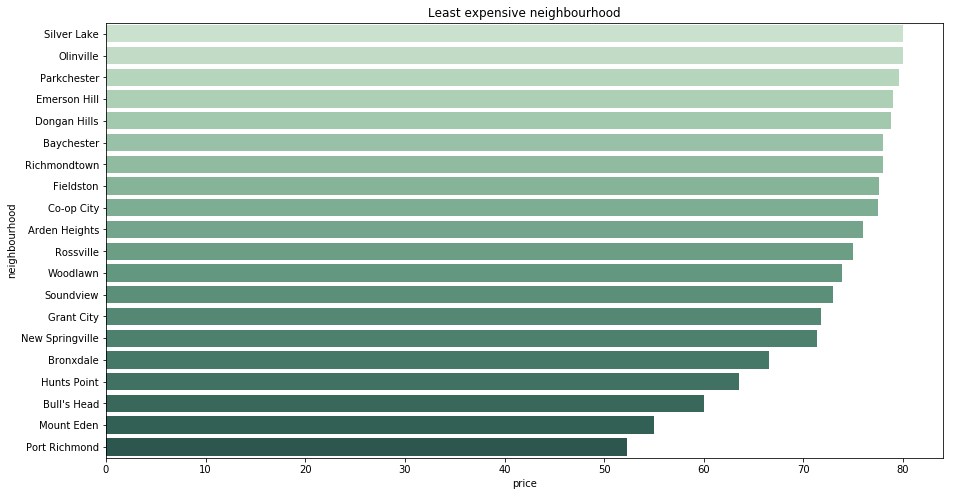

In [38]:
#plotting the twenty least expensive neighbourhood
bar1= sns.barplot(x='price', y = 'neighbourhood', data = analysis_neighbourhood.tail(20), orient = "h", palette = "ch:2.5,-.2,dark=.3")
plt.title("Least expensive neighbourhood")
plt.show()
fig2 = bar1.get_figure()  
fig2.savefig("least_expensive.png", dpi = 1000)

### Number of hotels by neighbourhood

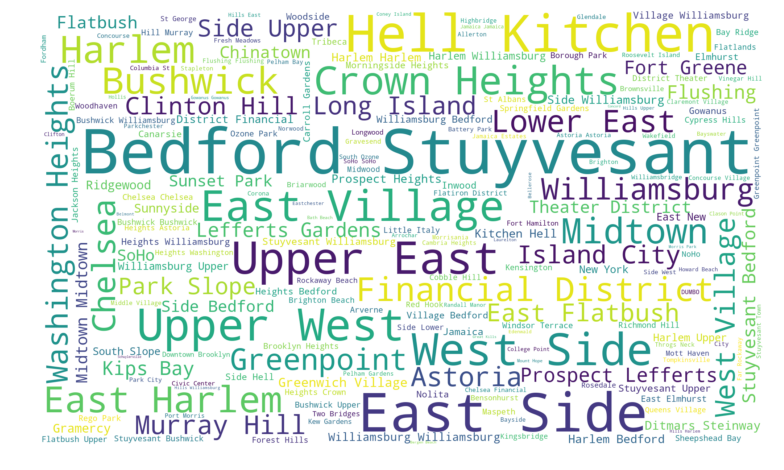

In [39]:
#wordcloud where the biggest words are the most frequent
wordcloud = WordCloud(background_color='white',
                          width=2000,
                          height=1200).generate(" ".join(data_f.neighbourhood))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("cloud.png")

### Mean price per neighboorhood group

In [40]:
"""
making a groupby in order to get the mean price of each neighbourhood group
"""
analysis_neighbourhoodgroup = data_f.groupby(["neighbourhood_group"])
analysis_neighbourhoodgroup = analysis_neighbourhoodgroup.mean().reset_index(drop = False)
analysis_neighbourhoodgroup

,neighbourhood_group,latitude,longitude,price,minimum_nights,availability_365
0,Bronx,40.848509,-73.882012,104.315951,4.806748,203.838957
1,Brooklyn,40.683647,-73.950939,136.088710,6.291167,162.132689
2,Manhattan,40.764074,-73.975317,190.684328,10.466208,178.240133
3,Queens,40.728195,-73.866262,110.211144,4.069501,189.561584
4,Staten Island,40.610250,-74.106122,109.916996,4.905138,219.142292


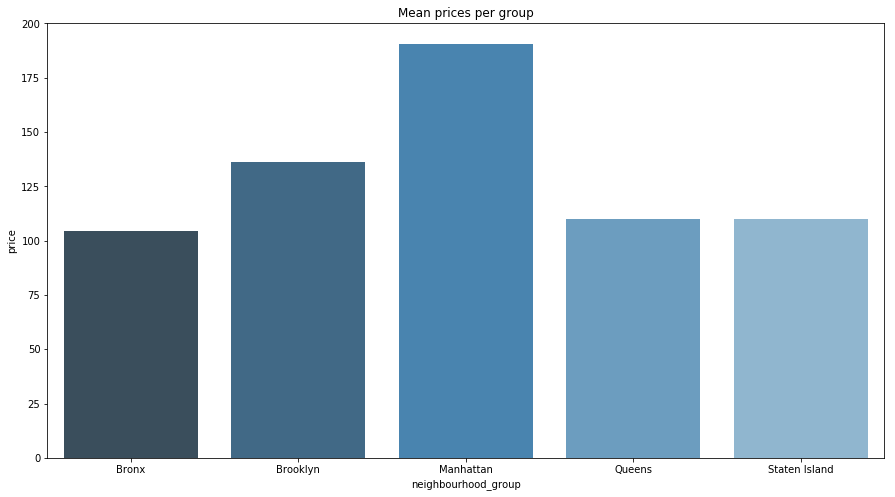

In [41]:
#plotting the relationship between price and NY zone
groupmean = sns.barplot(x='neighbourhood_group', y = 'price', data = analysis_neighbourhoodgroup, orient = "v", palette = "Blues_d")
plt.title("Mean prices per group")
plt.show()
groupmean.get_figure().savefig("Meanpricespergroup.png", dpi = 1000)

C:\Users\jeorv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


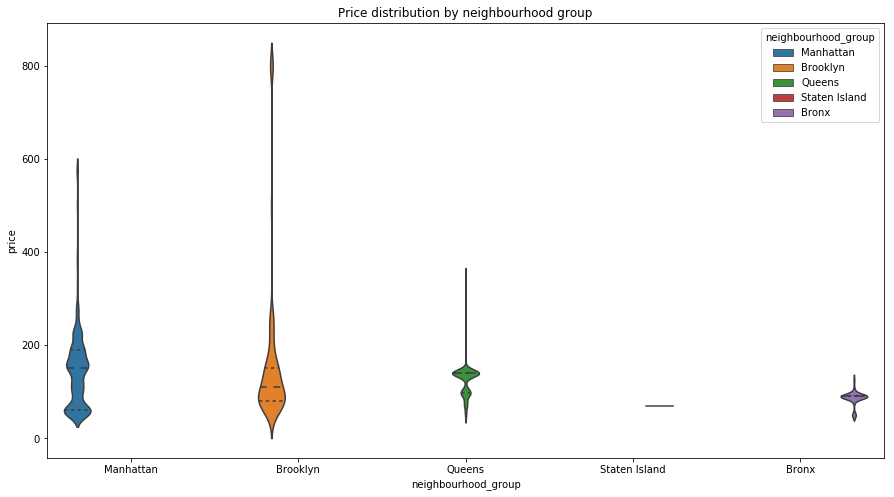

In [42]:
#plotting the relationship between price and NY zone
violin = sns.violinplot(x="neighbourhood_group", y="price", hue = 'neighbourhood_group', data = data_f.loc[data_f.price], inner = 'quartile')
plt.title("Price distribution by neighbourhood group")
plt.show()
figviolin = violin.get_figure()
figviolin.savefig("violin.png", dpi = 1000)

### Number of hotels by neighboorhood group

In [43]:
#getting the number of hotel by NY zone
number_of_hotels = data_f.groupby(["neighbourhood_group"]).neighbourhood.count()
number_of_hotels

neighbourhood_group
Bronx              652
Brooklyn         10664
Manhattan        12947
Queens            3410
Staten Island      253
Name: neighbourhood, dtype: int64

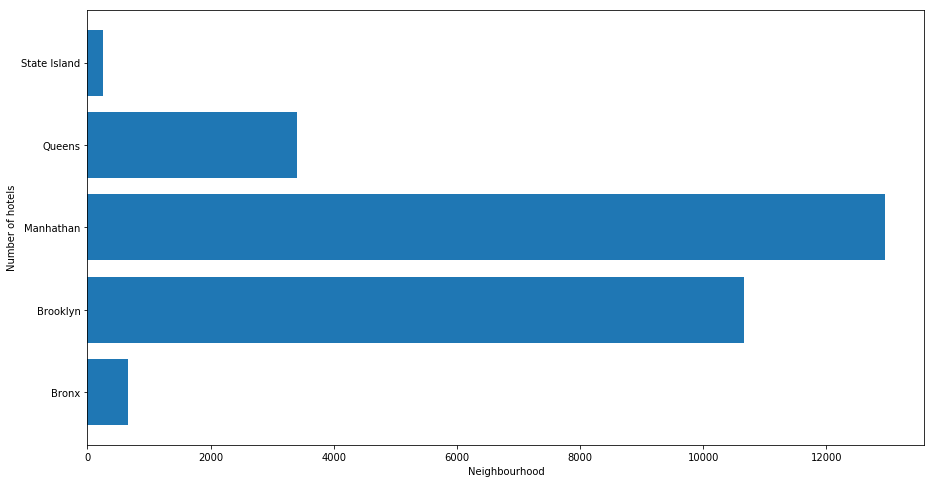

In [44]:
#plotting the number of hotels according to its NY zone
labels = ['Bronx','Brooklyn','Manhathan','Queens','State Island']
plt.barh(labels, number_of_hotels)
plt.xlabel("Neighbourhood")
plt.ylabel("Number of hotels")
plt.show()

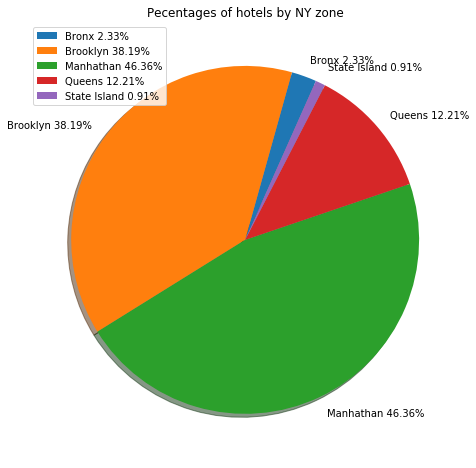

In [45]:
#getting the number of hotels in percentages
number_of_hotels = number_of_hotels/(number_of_hotels.sum())
number_of_hotels = ((number_of_hotels*100).round(2))
labels_percentage = [labels[i]+" "+str(number_of_hotels[i])+"%" for i in range(len(number_of_hotels))]

plt.pie(labels = labels_percentage,x = number_of_hotels, shadow = True, startangle=66)
plt.title("Pecentages of hotels by NY zone")
plt.legend()
plt.savefig("pie.png")
plt.show()

### Number of hotel by neighbourhood group and room type

In [46]:
#getting the number of hotels by NY zone and its type
type_per_neigh = data_f[['neighbourhood_group','room_type','neighbourhood']].groupby(['neighbourhood_group','room_type']).count()
#making a pivot to have the categorical variables as index and types rooms as columns
type_per_neigh = type_per_neigh.reset_index().pivot(index ='neighbourhood_group', columns = 'room_type', values = 'neighbourhood')
type_per_neigh

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,308,326,18
Brooklyn,5991,4609,64
Manhattan,8238,4470,239
Queens,1513,1860,37
Staten Island,147,102,4


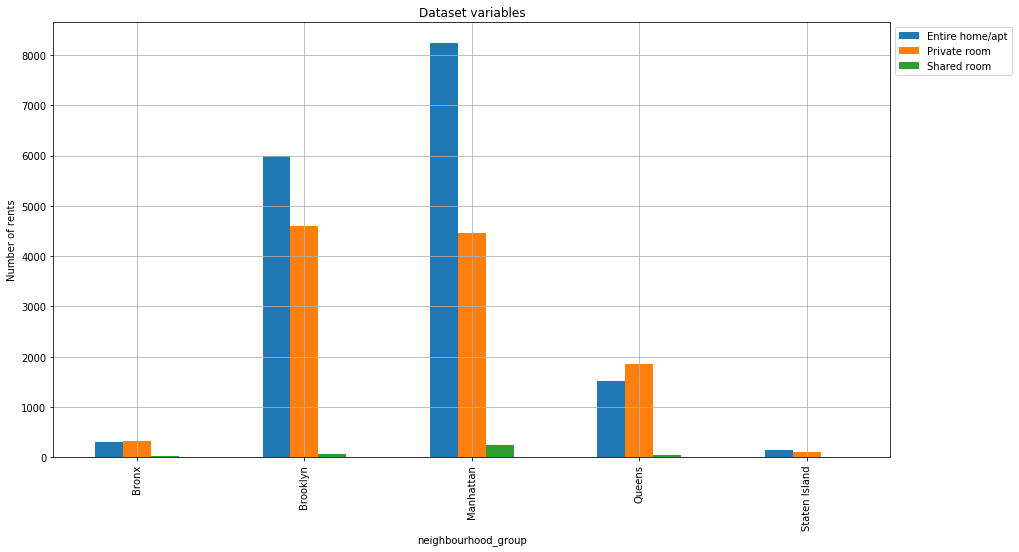

In [47]:
# plotting the bar plot of the latter relationship
typenumber = type_per_neigh.plot(kind = "bar")
plt.title("Dataset variables")
plt.ylabel("Number of rents")
plt.xticks(rotation = 90)
plt.grid(True)
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()
typenumber.get_figure().savefig("typenumber.png")

### Mean price by neighbourhood group and room type

In [48]:
#getting the mean of price by NY zone and its type
price_type_per_neigh = data_f[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type']).mean()
#making pivot to have the categorical variables as index and numerical variables as columns
price_type_per_neigh = price_type_per_neigh.reset_index().pivot(index ='neighbourhood_group', columns = 'room_type', values = 'price')
price_type_per_neigh

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,131.467532,77.960123,117.055556
Brooklyn,175.727091,85.042309,101.703125
Manhattan,233.001214,117.392170,102.857741
Queens,148.799075,79.156989,93.378378
Staten Island,132.809524,77.362745,98.750000


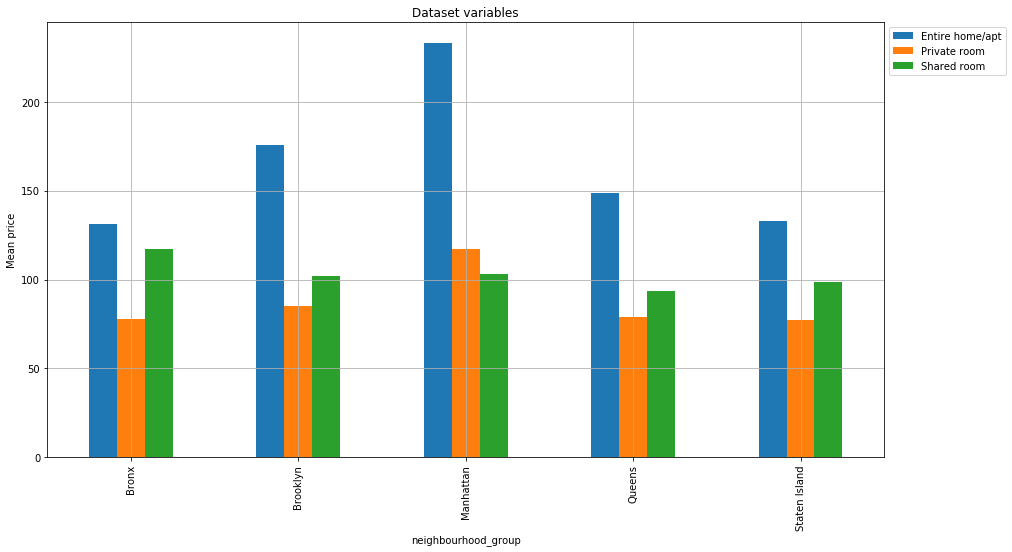

In [49]:
#plotting the relationship latter shown
type_price = price_type_per_neigh.plot(kind = "bar")
plt.title("Dataset variables")
plt.ylabel("Mean price")
plt.xticks(rotation = 90)
plt.grid(True)
plt.legend(loc = "upper left", bbox_to_anchor = (1,1))
plt.show()
type_price.get_figure().savefig("typeprice.png")

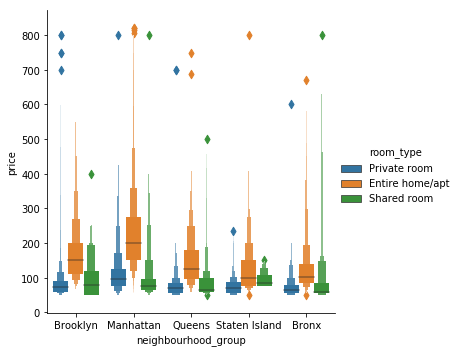

In [50]:
#catplot of type boxen that shows this relathionship between price and room type according to its NY zone
type_catplot = sns.catplot(x="neighbourhood_group", y="price", hue = 'room_type',kind="boxen",data=data_f)
plt.show()
type_catplot.savefig("typecatplot.png", dpi = 1000)

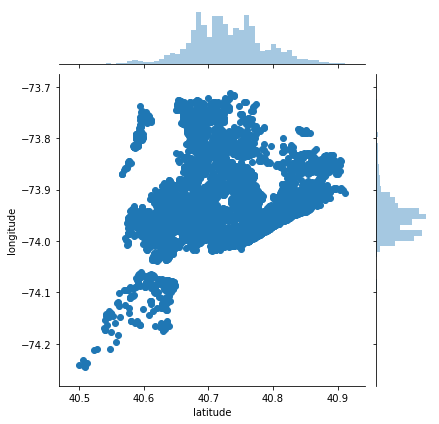

In [51]:
#plot i wanted to do, but it was useless in my dataset, so do not take it in account
sns.jointplot("latitude", "longitude", data=data_f)